In [1]:
# 1.3 - word count with text content from a corpus of documents
#
# code for the Intuitive Text Mining book
# Tariq Rashid, 2018

In [2]:
# import pandas for dataframe functions
import pandas

# collections includes counter
import collections

# word cloud and plotting
import matplotlib.pyplot as plt
import wordcloud

# glob module for finding files that match a pattern
import glob
# os module for filename manipulation
import os

In [3]:
# read corpus text

# start with empty text passage
my_text = ""

# corpus location and text filename pattern
content_directory = 'data_sets/fairytales/txt/'
text_filename_pattern = '??.txt'

# list of text files
list_of_text_files = glob.glob(content_directory + text_filename_pattern)

# read text from every text file
for text_file_name in list_of_text_files:
    print("reading from ...", text_file_name)
    with open(text_file_name, "r") as f:
        text_content = f.read()
        my_text += text_content
        pass
    pass

# replace new line with space and new line
# to avoid words joining from end of line to begnning of next line
my_text = my_text.replace('\n', ' \n')

# print(my_text)

reading from ... data_sets/fairytales/txt/01.txt
reading from ... data_sets/fairytales/txt/00.txt
reading from ... data_sets/fairytales/txt/02.txt
reading from ... data_sets/fairytales/txt/03.txt


In [4]:
# read stopwords from file

# stopword list file
stop_words_file = 'stopwords/terrier-stop.txt'

with open(stop_words_file, "r") as f:
    stop_words = f.read().split()
    pass

# remove comments lines starting with #
stop_words = [word for word in stop_words if word[:1]!='#']

print('number of stop words =', len(stop_words))

number of stop words = 733


In [5]:
# make lowercase
my_text = my_text.lower()

# keep only normal letters and spaces, remove punctuation
cleaned_text = [char for char in my_text if char.isalpha() or char==" "]
cleaned_text = "".join(cleaned_text)

# split the text into words
word_list = cleaned_text.split()

# remove stop words
word_list = [w for w in word_list if w not in stop_words]

print("number of words =", len(word_list) )
#print(word_list)

number of words = 2652


In [6]:
# count words

# dictionary of word counts
wordcount_dict = collections.Counter(word_list)

print("unique words =", len(wordcount_dict) )

unique words = 1095


In [7]:
# pandas data frame

df = pandas.DataFrame.from_dict(wordcount_dict, orient="index", columns=['count'])

# add name to index
df.index.name = 'word'

# sort by count column, largest to smallest
df.sort_values('count', ascending=False, inplace=True)

# show top 10
df[:10]

,count
word,
little,41
jack,34
princess,28
time,24
went,23
great,22
old,22
giant,22
came,20


(-0.5, 1199.5, 799.5, -0.5)

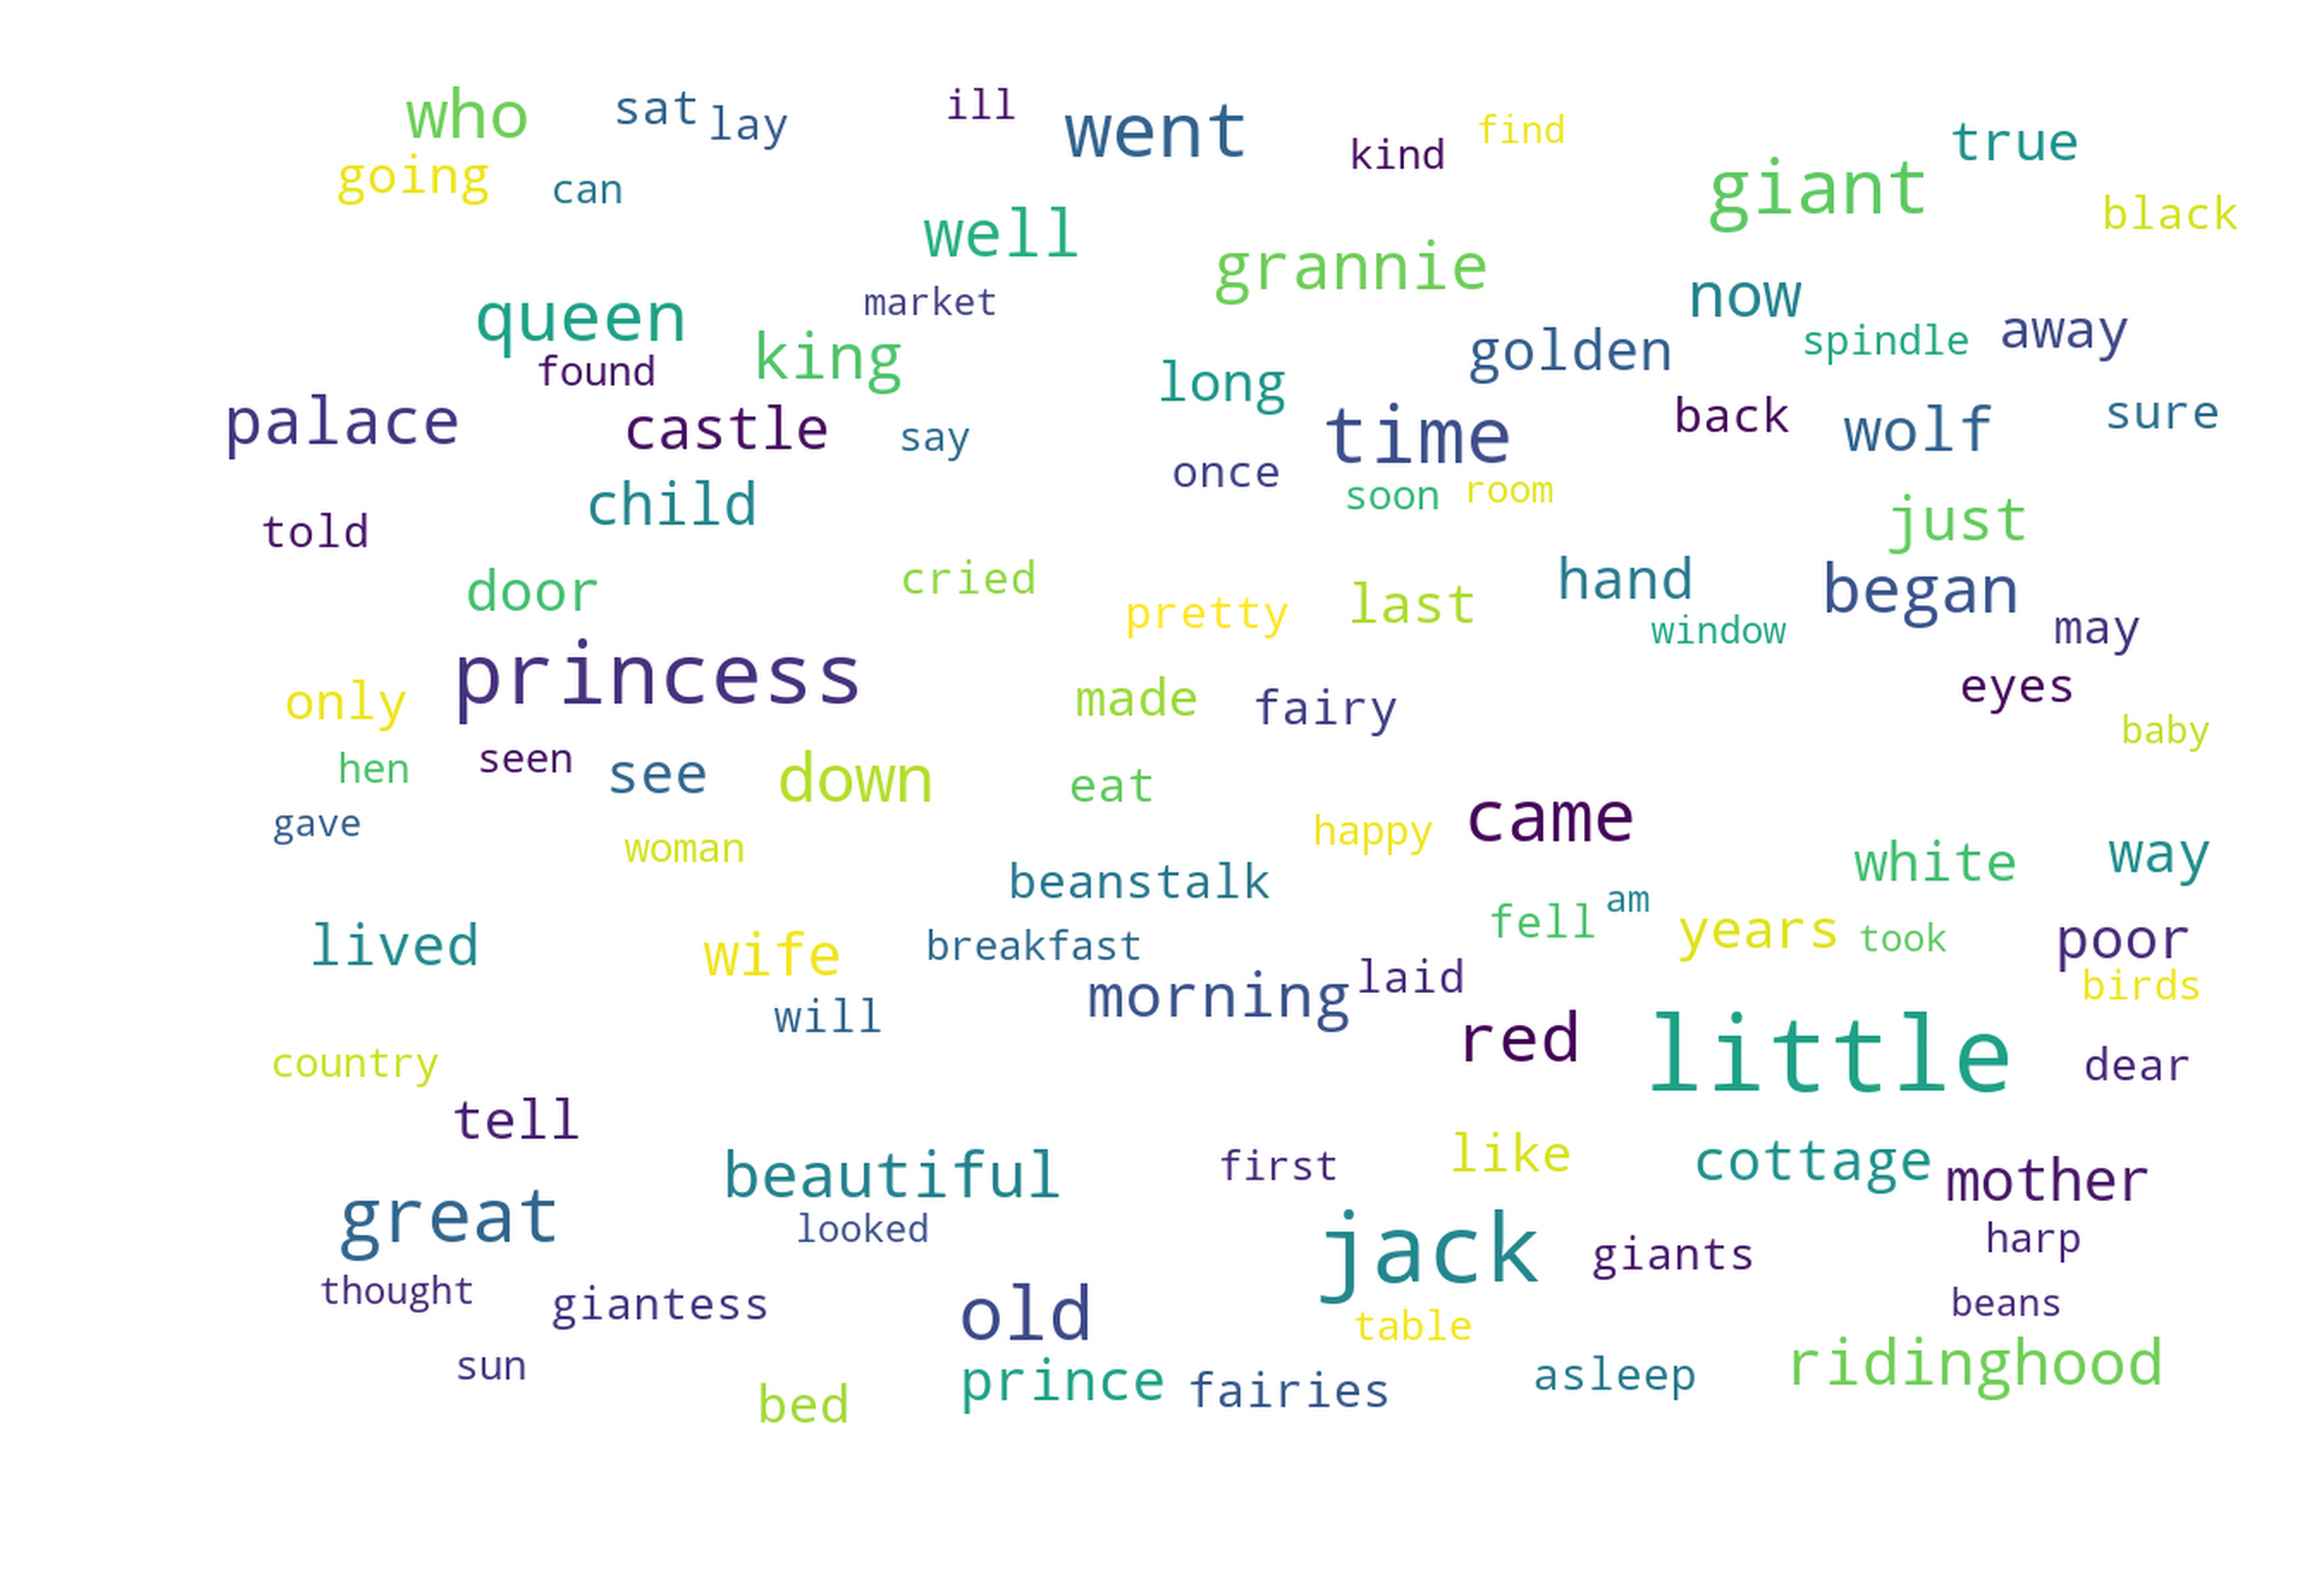

In [14]:
# word cloud

# wordcloud object
wc = wordcloud.WordCloud(colormap='viridis', max_font_size=60, max_words=100, width=1200, height=800, background_color="white", margin=10, prefer_horizontal=1.0)

# words and word count
wc.generate_from_frequencies(wordcount_dict)

# plot wordcloud
plt.figure(dpi=600, figsize=(6,4))
plt.imshow(wc, interpolation='lanczos')
plt.axis("off")